# Fibonacci Numbers
*Written by James Onyegbosi*

---

*Editor's Note:*

This article was inspired by a YouTube video by Stand-up Maths called "Complex Fibonacci Numbers?". The link to the original video is [here](https://www.youtube.com/watch?v=ghxQA3vvhsk) .

---

## Introduction

The Fibonacci sequence is a sequence in which each number is the sum of the two preceding ones. Starting from 0 and 1, the sequence begins:

$$
\begin{align*}
0 \text{,} \ 1 \text{,} \ 1 \text{,} \ 2 \text{,} \ 3 \text{,} \ 5 \text{,} \ 8 \text{,} \ 13 \text{,} \ 21 \text{,} \ 34 \text{,} \ 55 \text{,} \ 89 \text{,} \ 144 \text{,} \ \text{....}
\end{align*}
$$

Moreover, this sequence can be defined using a series of equations:

$$
\begin{align*}
F(0) &= 0 \\
F(1) &= 1 \\
F(n) &= F(n-1) + F(n-2) \quad \text{, } n \geq 2
\end{align*}
$$

Here, the function $F(n)$ is equal to the nth term Fibonacci number for all integer values of n greater than or equal to 2.

These equations can be implemented as a recursive algorithm that will generate a Fibonacci sequence upto the nth term. The following Python code generates the sequence upto 5th term, starting with 0 and proceeding with 1st term, 1. 

In [83]:
def fibonacci_sequence(n):
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        sequence = [0, 1]
        for i in range(2, n+1):
            sequence.append(sequence[i-1] + sequence[i-2])
        
        return sequence

print(fibonacci_sequence(5))  # Change the "5" on this line to change the value of n.

[0, 1, 1, 2, 3, 5, 8, 13]


## Different Fibonacci Numbers

### Negative Fibonacci Numbers

Fibonacci sequences can also include negative numbers for nth terms less than 0:

$$
\begin{align*}
\text{....} \ {-144} \text{,} \ 89 \text{,} \ {-55} \text{,} \ 34 \text{,} \ {-21} \text{,} \ 13 \text{,} \ {-8} \text{,} \ 5 \text{,} \ {-3} \text{,} \ 2 \text{,} \ {-1} \text{,} \ 1 \text{,} \ 0 \text{,} \ \text{....}
\end{align*}
$$

Notice how all the odd nth terms less than 0 remain positive while the even terms less than 0 become negative. We can use this to create a new recurrence relation for negative nth terms:

$$
\begin{align*}
F(-n) = (-1)^{n+1} \ F(n)
\end{align*}
$$

### The Binet Formula

We can generalise the function $F(n)$ to include negative integer nth terms using the Binet formula:

$$
\begin{align*}
F(n) = \frac{\varphi^n - \psi^n}{\sqrt{5}}
\end{align*}
$$

where:

$$
\begin{align*}
\varphi = \frac{1 + \sqrt{5}}{2} \quad \text{and} \quad \psi = \frac{1 - \sqrt{5}}{2}
\end{align*}
$$

*Note:* $\varphi$ is also known as the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) , while $\psi$ is the conjugate (or negative reciprocal) of $\varphi$.

Furthermore, we can use this formula to improve our Python code from earlier. The variables `n1` and `n2` represents the lower and upper bounds, respectively, of the range of nth terms the function will generate. To demonstrate, I have set `n1` to equal -7 and `n2` to equal 3.

In [85]:
phi = (1 + 5**0.5)/2
psi = (1 - 5**0.5)/2

def fibonacci_sequence(n1, n2):
    sequence = []
    for n in range(n1, n2 + 1):
        num = round(((phi**n) - (psi**n)) / (5**0.5))
        sequence.append(num)
        
    return sequence

print(fibonacci_sequence(-7, 3))  # Change the "-7" and "3" on this line to change the range of values of n.

[13, -8, 5, -3, 2, -1, 1, 0, 1, 1, 2]


### Complex Fibonacci Numbers

But what about using fractional values of n? Notice how $\psi$ is a negative value as 1 is less than the square root of 5. Therefore, if we make n, lets say, 1/2, we would be square rooting a negative value which will give a complex number.

Using this knowledge, we can plot the function $F(n)$ on plot on an Argand diagram:

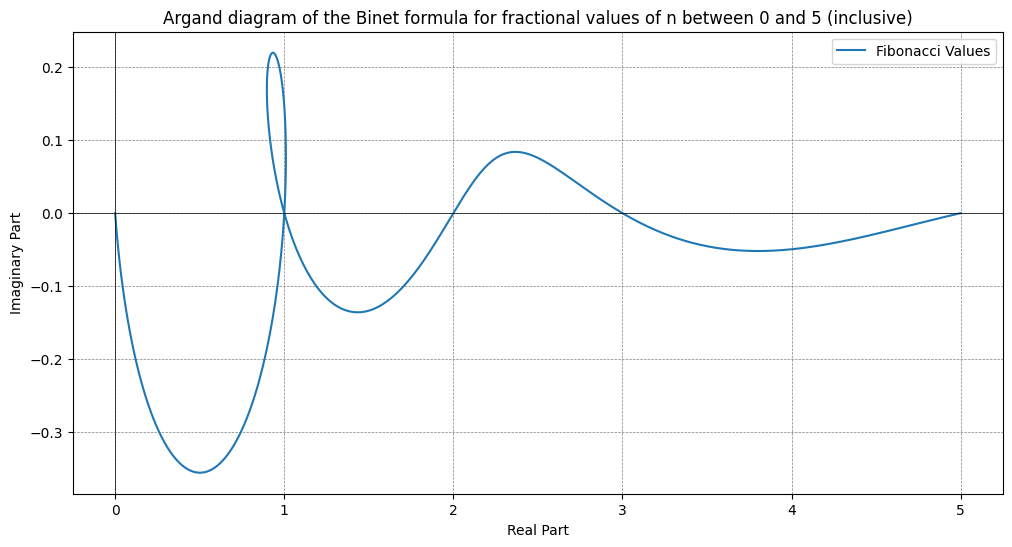

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
phi = (1 + np.sqrt(5)) / 2
psi = (1 - np.sqrt(5)) / 2

def binet_formula(n):
    return (phi**(n + 0j) - psi**(n + 0j)) / np.sqrt(5)

# Generate values for n, including fractional values
n_values = np.linspace(0, 5, 400)

# Calculate Fibonacci values using the Binet formula
fibonacci_values = binet_formula(n_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting first set of Fibonacci values
plt.plot(fibonacci_values.real, fibonacci_values.imag, label="Fibonacci Values")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Argand diagram of the Binet formula for fractional values of n between 0 and 5 (inclusive)')

plt.legend()
plt.show()


Notice how the values in which the graph intersects the real axis are the terms of the original Fibonacci sequence. Also notice how to graph crosses the 1 on the real axis twice, representing the two repeated 1's in the original sequence.

Generating the graph for greater and more negative values of n also gives rise to another interesting shape.

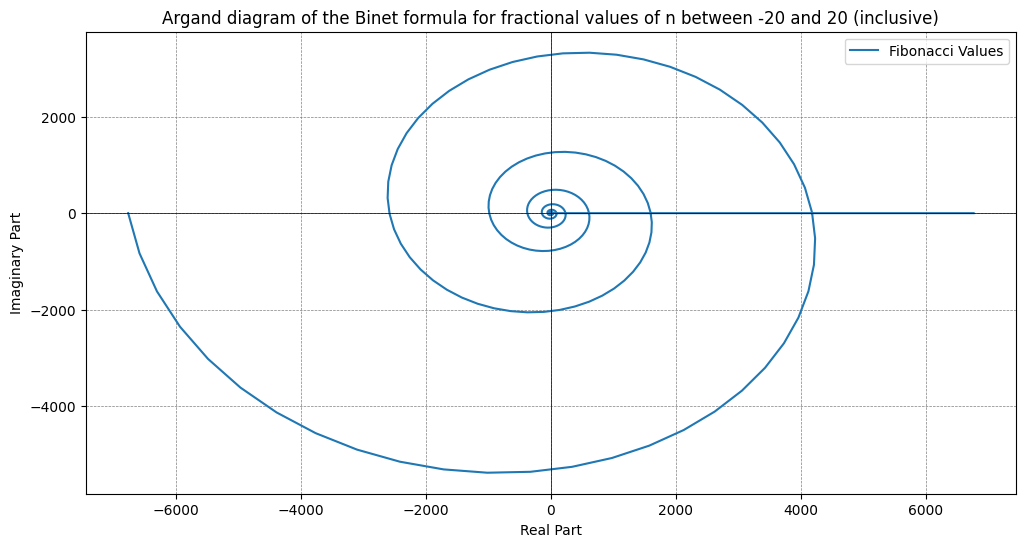

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
phi = (1 + np.sqrt(5)) / 2
psi = (1 - np.sqrt(5)) / 2

def binet_formula(n):
    return (phi**(n + 0j) - psi**(n + 0j)) / np.sqrt(5)

# Generate values for n, including fractional values
n_values = np.linspace(-20, 20, 10**3)

# Calculate Fibonacci values using the Binet formula
fibonacci_values = binet_formula(n_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting first set of Fibonacci values
plt.plot(fibonacci_values.real, fibonacci_values.imag, label="Fibonacci Values")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Argand diagram of the Binet formula for fractional values of n between -20 and 20 (inclusive)')

plt.legend()
plt.show()